### Recommendation system using python

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Loading the data
movies = pd.read_csv("C:\\Users\\moses\\Downloads\\ml-latest-small\\ml-latest-small\\movies.csv")
ratings = pd.read_csv("C:\\Users\\moses\\Downloads\\ml-latest-small\\ml-latest-small\\ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movie_df = movies.merge(ratings, on="movieId")

In [6]:
dataframe = pd.DataFrame(movie_df)
dataframe

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


# EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
dataframe.groupby("title")["rating"].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [9]:
dataframe.groupby("title")["rating"].count().sort_values(ascending=False).head(20)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

In [10]:
# Creating a dataframe with title and rating as the columns
# This is a sub-dataframe that is a dataframe created from the main dataframe

movie_ratings = pd.DataFrame(dataframe.groupby("title")["rating"].mean())
movie_ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [11]:
movie_ratings["no' of ratings"] = pd.DataFrame(dataframe.groupby("title")["rating"].count())
movie_ratings.head()

,rating,no' of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [12]:
movie_ratings.head()

,rating,no' of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


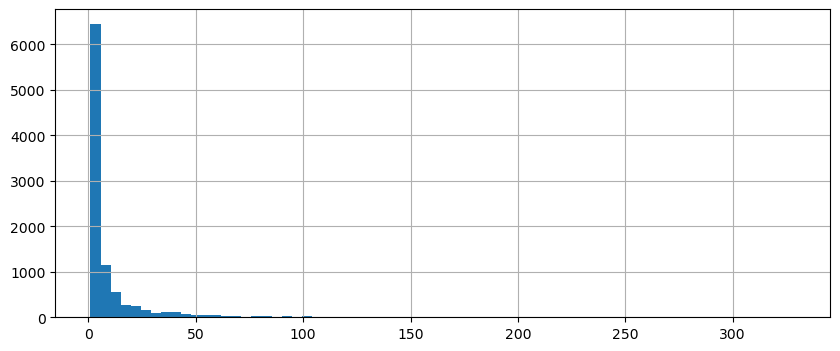

In [13]:
# Visualizing the movies on ratings
plt.figure(figsize=(10, 4))
movie_ratings["no' of ratings"].hist(bins=70)
plt.show()

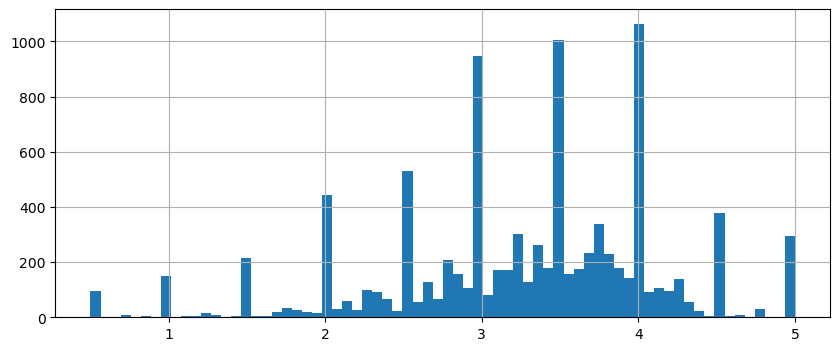

In [14]:
plt.figure(figsize=(10, 4))
movie_ratings["rating"].hist(bins=70)
plt.show()

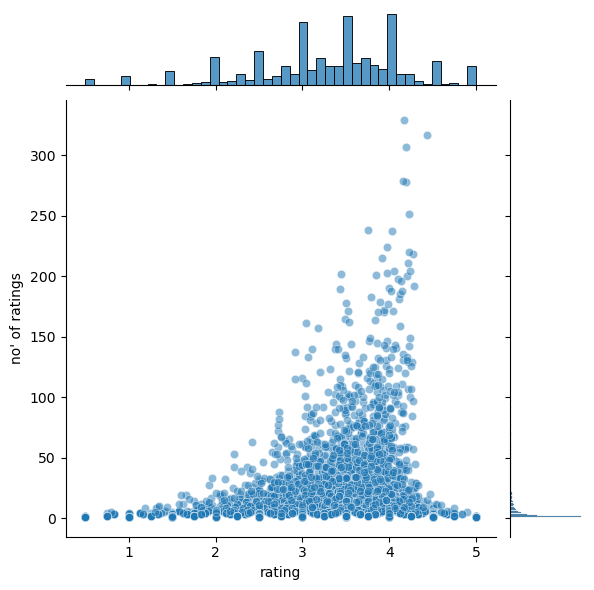

In [15]:
sns.jointplot(x="rating",y="no' of ratings",data=movie_ratings, alpha=0.5)
plt.show()

In [16]:
movie_matrix = dataframe.pivot_table(index="userId",columns="title",values="rating")

In [17]:
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
movie_ratings.sort_values("no' of ratings",ascending=False).head(10)

,rating,no' of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [19]:
# Using two movies as an example from our dataframe
movie_name = input("Enter the movie title: ")
# forest_gump = movie_matrix["Forrest Gump (1994)"]
movie_title = movie_matrix[movie_name]
#pulp_fiction = movie_matrix["Pulp Fiction (1994)"]
movie_title.head()

Enter the movie title:  Toy Story (1995)


userId
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: Toy Story (1995), dtype: float64

In [20]:
# Correlating the movies with forest gump to find the similarities or a movie that might be similar to it
similar_to_movie_title = movie_matrix.corrwith(movie_title)
#similar_to_pulp_fiction = movie_matrix.corrwith(pulp_fiction)

In [21]:
corr_movie_title = pd.DataFrame(similar_to_movie_title, columns=["Correlation"])
corr_movie_title.dropna(inplace=True)
corr_movie_title.sort_values("Correlation", ascending=False).head(10)
filter = corr_movie_title.join(movie_ratings["no' of ratings"])
filter.head()
filter["no' of ratings"]
corr_movie_title[filter["no' of ratings"]>100].sort_values("Correlation", ascending=False)

,Correlation
title,
Toy Story (1995),1.000000
"Incredibles, The (2004)",0.643301
Finding Nemo (2003),0.618701
Aladdin (1992),0.611892
"Monsters, Inc. (2001)",0.490231
...,...
"Rock, The (1996)",-0.038208
Good Will Hunting (1997),-0.044629
Interview with the Vampire: The Vampire Chronicles (1994),-0.061637


In [25]:
def recommend():
    movie_matrix = dataframe.pivot_table(index="userId",columns="title",values="rating")
    movie_name = input("Enter the movie title: ")
    movie_title = movie_matrix[movie_name]
    similar_to_movie_title = movie_matrix.corrwith(movie_title)
    corr_movie_title = pd.DataFrame(similar_to_movie_title, columns=["Correlation"])
    corr_movie_title.dropna(inplace=True)
    corr_movie_title.sort_values("Correlation", ascending=False).head(10)
    filter = corr_movie_title.join(movie_ratings["no' of ratings"])
    recommended = corr_movie_title[filter["no' of ratings"]>100].sort_values("Correlation", ascending=False).head()
    return recommended
    
recommend()

Enter the movie title:  Toy Story (1995)


,Correlation
title,
Toy Story (1995),1.000000
"Incredibles, The (2004)",0.643301
Finding Nemo (2003),0.618701
Aladdin (1992),0.611892
"Monsters, Inc. (2001)",0.490231


In [38]:
import pickle as pkl
with open("recommend", "wb") as fxn:
    pkl.dump(recommend, fxn)